# Find closures

`gio` is mostly about data loading, but it can do a few other useful things. One of those things is finding closed contours on a grid.

Let's start by making a random grid,and we'll scale it to make it more like a geological surface:

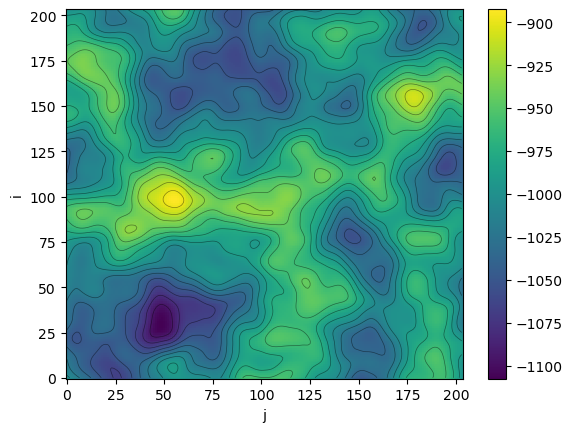

In [2]:
import matplotlib.pyplot as plt
import gio

g = gio.generate_random_surface(200, res=3, octaves=3, random_seed=42)
g = 100 * g - 1000

g.plot()
plt.contour(g, levels=20, colors='black', linewidths=0.5, linestyles='solid', alpha=0.45)

Now we can ask `gio` to find the closing contours.

In [3]:
contours = gio.find_closures(g)

The result is a bunch of `shapely.Polygon` objects:

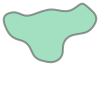

In [4]:
contours[10]

The 'level' (contour value) is stored as the z-value of the `Polygon`.

Let's plot them:

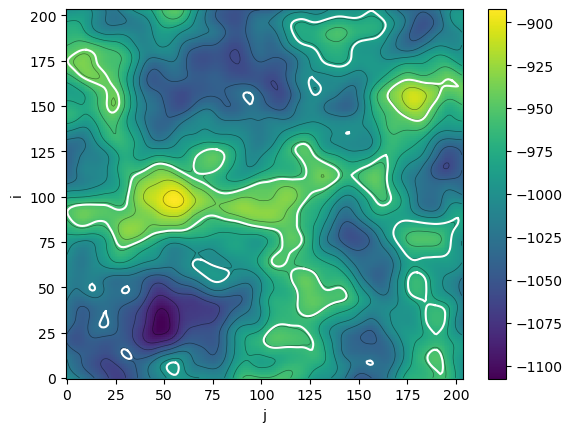

In [5]:
g.plot.imshow()
plt.contour(g, levels=10, colors='black', linewidths=0.5, linestyles='solid', alpha=0.45)

for c in contours:
    plt.plot(*c.exterior.xy, 'white')

Cool! But we probably don't care about tiny closures. We can apply minimum area (in whatever units the grid cells represent) or minimum closure height (or both!), e.g.

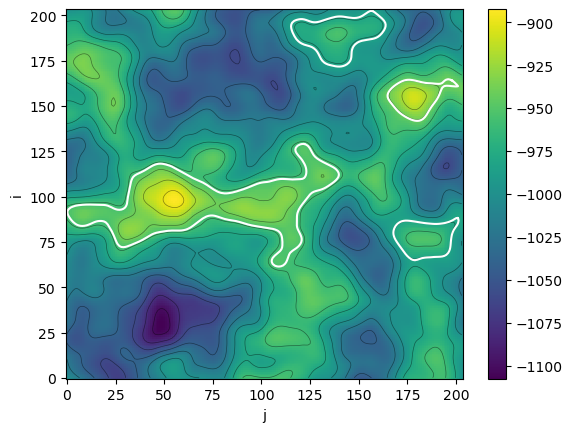

In [6]:
contours = gio.find_closures(g, min_height=25)

g.plot.imshow()
plt.contour(g, levels=10, colors='black', linewidths=0.5, linestyles='solid', alpha=0.45)

for c in contours:
    plt.plot(*c.exterior.xy, 'white')

Shapely `Polygon` objects are nice because they can do lots of things. They also know their own areas:

In [7]:
for i, c in enumerate(contours):
    print(f"Polygon {i} area: {c.area:.1f} grid cells")

Polygon 0 area: 833.8 grid cells
Polygon 1 area: 539.2 grid cells
Polygon 2 area: 3236.9 grid cells
Polygon 3 area: 454.2 grid cells
